In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int6

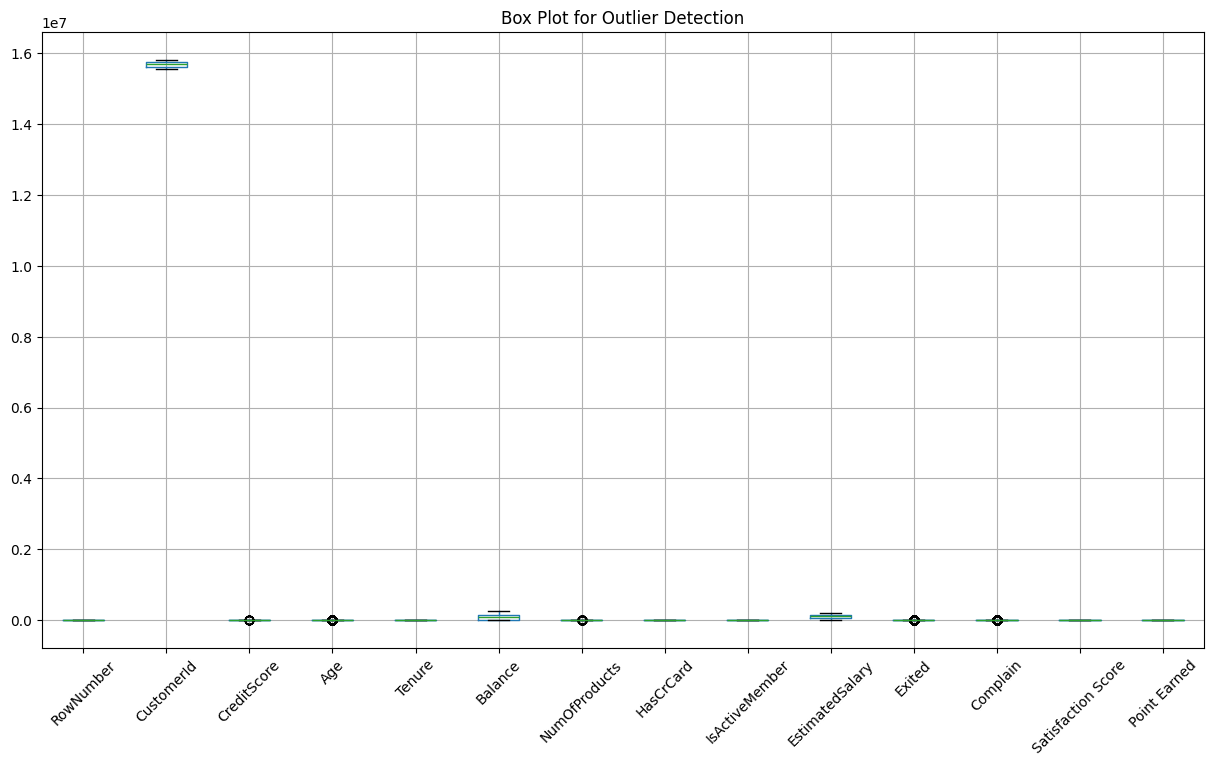

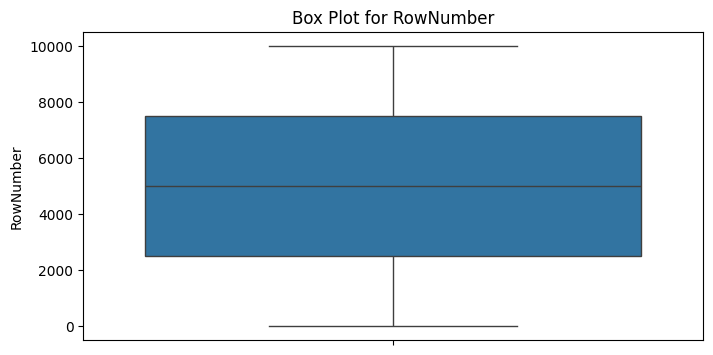

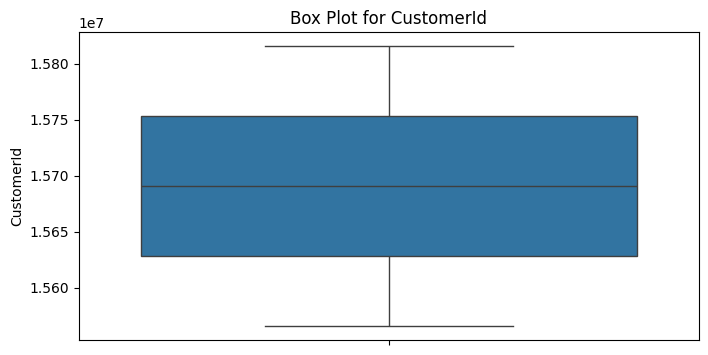

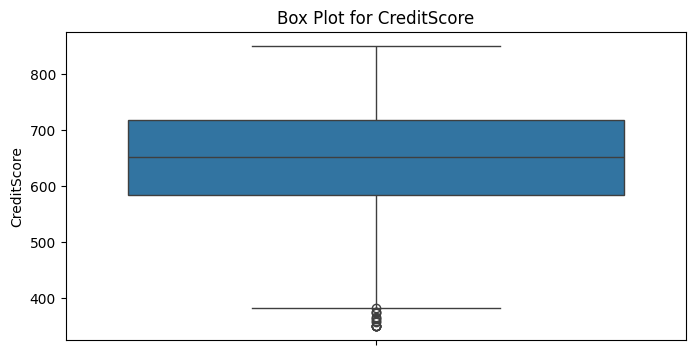

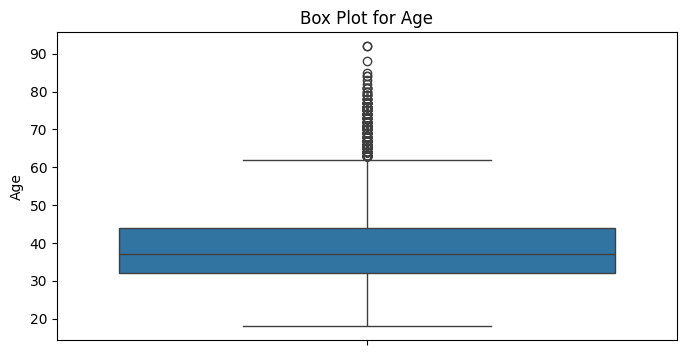

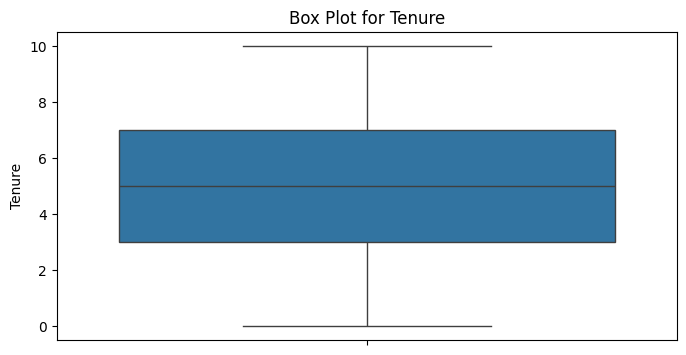

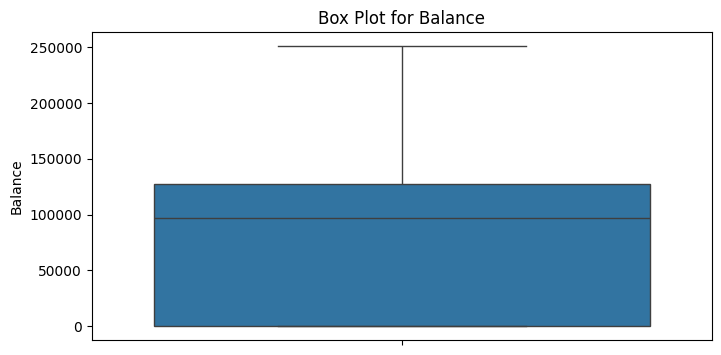

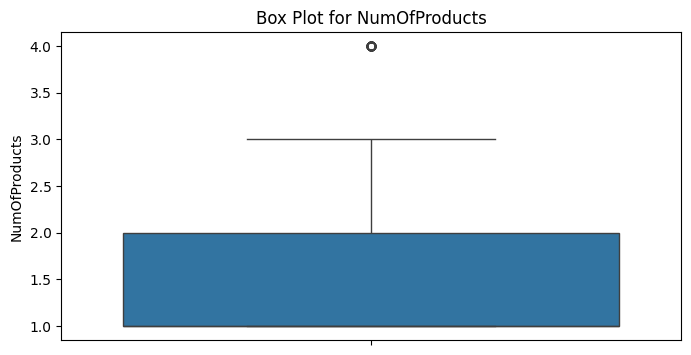

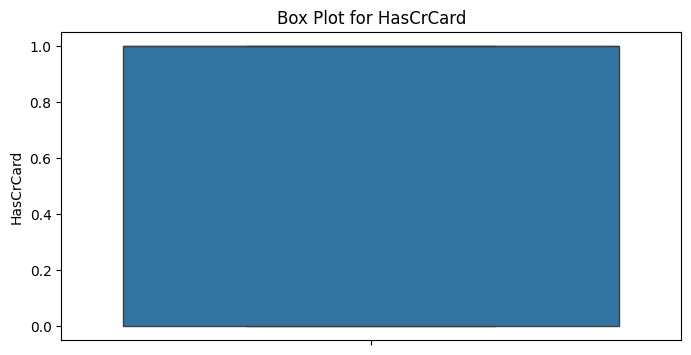

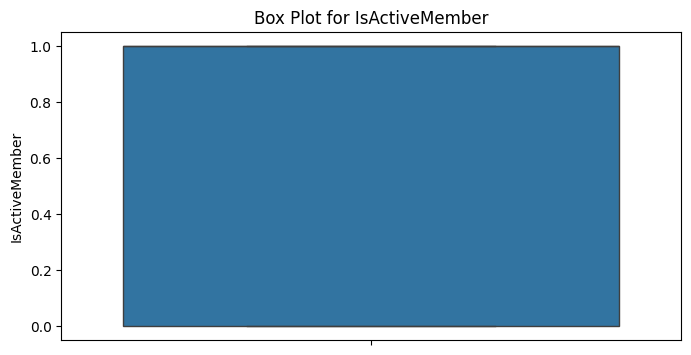

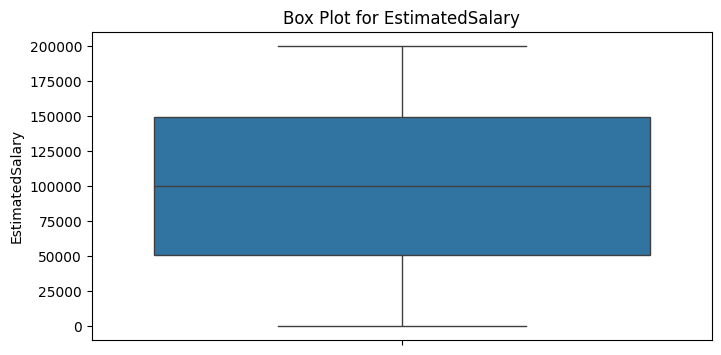

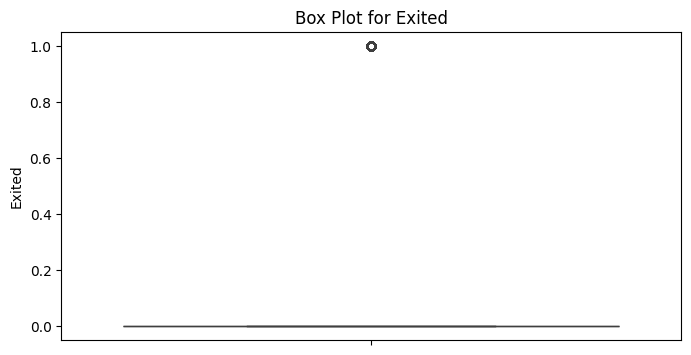

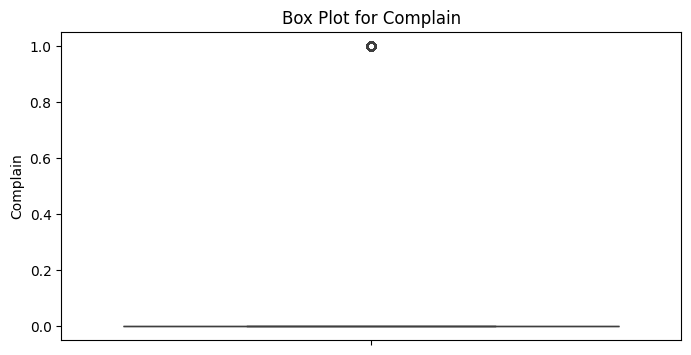

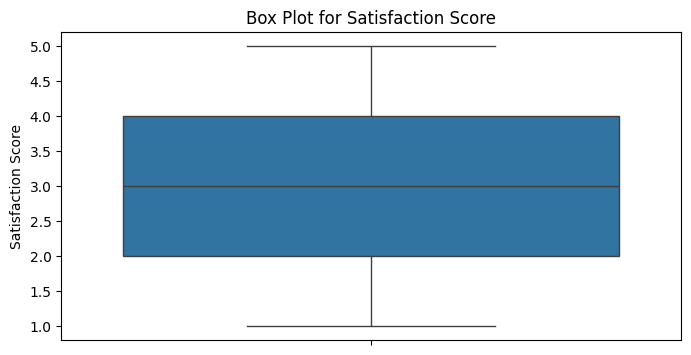

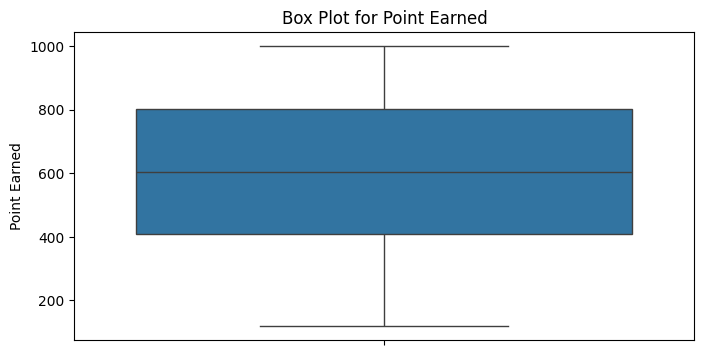

Column: RowNumber, Outliers detected: 0
Column: CustomerId, Outliers detected: 0
Column: CreditScore, Outliers detected: 15
Column: Age, Outliers detected: 359
Column: Tenure, Outliers detected: 0
Column: Balance, Outliers detected: 0
Column: NumOfProducts, Outliers detected: 60
Column: HasCrCard, Outliers detected: 0
Column: IsActiveMember, Outliers detected: 0
Column: EstimatedSalary, Outliers detected: 0
Column: Exited, Outliers detected: 2038
Column: Complain, Outliers detected: 2044
Column: Satisfaction Score, Outliers detected: 0
Column: Point Earned, Outliers detected: 0


In [4]:
# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns

# Plot box plots for numerical columns to detect outliers
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title("Box Plot for Outlier Detection")
plt.show()
# Plot individual box plots for each numerical column to detect outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()
# Detect outliers using IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
# Print the number of outliers per column
for col, outlier_values in outliers.items():
    print(f"Column: {col}, Outliers detected: {len(outlier_values)}")


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
X = df[numerical_cols]
y = df['NumOfProducts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_preds)}")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_preds)}")


SVM Accuracy: 0.5195567144719687
Random Forest Accuracy: 0.999348109517601


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
file_path = "/mnt/data/Bank-Customer-Attrition-Insights-Data.csv"
numerical_cols = df.select_dtypes(include=['number']).columns
if 'NumOfProducts' in df.columns:
    y = df['NumOfProducts']
else:
    print("Error: Target column 'NumOfProducts' not found. Available columns:", df.columns)
    exit()
X_original = df[numerical_cols]
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_original, y, test_size=0.2, random_state=42)

svm_model_orig = SVC()
svm_model_orig.fit(X_train_orig, y_train_orig)
svm_preds_orig = svm_model_orig.predict(X_test_orig)
print(f"SVM Accuracy without outlier removal: {accuracy_score(y_test_orig, svm_preds_orig)}")

rf_model_orig = RandomForestClassifier()
rf_model_orig.fit(X_train_orig, y_train_orig)
rf_preds_orig = rf_model_orig.predict(X_test_orig)
print(f"Random Forest Accuracy without outlier removal: {accuracy_score(y_test_orig, rf_preds_orig)}")

cleaned_df = df.copy()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
X_cleaned = cleaned_df[numerical_cols]
y_cleaned = cleaned_df['NumOfProducts']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

svm_model_clean = SVC()
svm_model_clean.fit(X_train_clean, y_train_clean)
svm_preds_clean = svm_model_clean.predict(X_test_clean)
print(f"SVM Accuracy with outlier removal: {accuracy_score(y_test_clean, svm_preds_clean)}")

rf_model_clean = RandomForestClassifier()
rf_model_clean.fit(X_train_clean, y_train_clean)
rf_preds_clean = rf_model_clean.predict(X_test_clean)
print(f"Random Forest Accuracy with outlier removal: {accuracy_score(y_test_clean, rf_preds_clean)}")


SVM Accuracy without outlier removal: 0.5195567144719687
Random Forest Accuracy without outlier removal: 0.9967405475880052
SVM Accuracy with outlier removal: 0.5314591700133868
Random Forest Accuracy with outlier removal: 0.999330655957162
